## Exercise 2: Fraunhofer and Fresnel Diffraction
Aim: Calculate near and far-field diffraction patterns of an arbitrary one-dimensional complex aperture using FFT.

In [1]:
# Import relevant modules and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

### Core task 1
Physics parameters involved: wavelength of light ($\lambda$), wavenumbe (k), distance to screen (D), position along aperture (x), extent of aperture (L), width of slit (d) with units all being in metres.

Simulation parameters involved: number of sample points along aperture (N)

Start with defining the aperture function:
$$
A'(x) = e^{ikx^2/2D}A(x)

$$

Conversion from fourier parameter to real space parameter:
$$
y = \frac{D}{k}y'
$$

Top hat aperture:
$$
A(x) = \begin{cases}
1 &, |x| < d/2\\
0&, \text{otherwise}
\end{cases}
$$

For far-field diffraction (Fraunhofer), the resulting pattern on the screen is simply the Fourier Transform of the aperture function, A(x).
$$
\psi(y) = \int A(x) e^{-\frac{ikxy}{D}}dx
$$



In [2]:
# Physical parameters
wavelength = 500e-9
D = 1 # Distance to screen
L = 5e-3 # Extent of the aperture
d = 100e-6 # Width of the slit
k = 2*np.pi/wavelength # Wavenumber
x_max = d/2 # Maximum extent of the aperture

# Check for validity of far field approximation (Fraunhofer vs Frenel)
if D > x_max**2 / wavelength:
    print("D =", D, ">", x_max**2 / wavelength)
    print("Far field approximation is valid")
    far_field = True
else:
    print("D =", D, "<", x_max**2 / wavelength)
    print("Far field approximation is not valid")
    far_field = False

# Simulation parameters
N = 2**16 # Number of sample points
x = np.linspace(-L/2, L/2, N) # Define the x-axis of aperture
delta = L/N # Distance between sample points

# Define the aperture function
def single_slit_grating(x, hat_width):
    a = np.zeros(N)
    left = int(N/2 - hat_width/delta/2)
    right = int(N/2 + hat_width/delta/2)
    a[left-1:right+1] = 1.0
    return a

D = 1 > 0.005
Far field approximation is valid


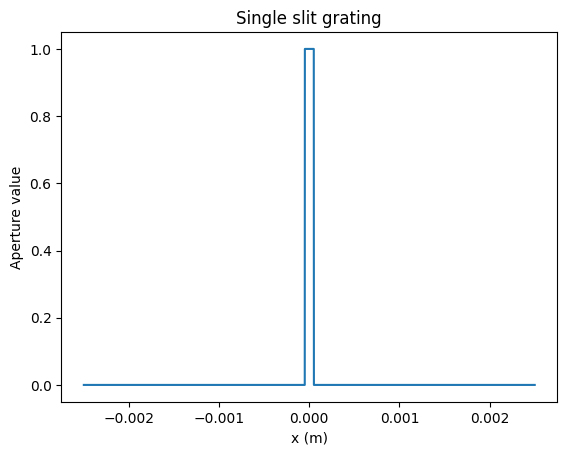

In [3]:
# Plot of the slit
plt.plot(x, single_slit_grating(x, d))
plt.xlabel('x (m)')
plt.ylabel('Aperture value')
plt.title('Single slit grating')
plt.show()

/Users/shikang/miniconda3/envs/virtualenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


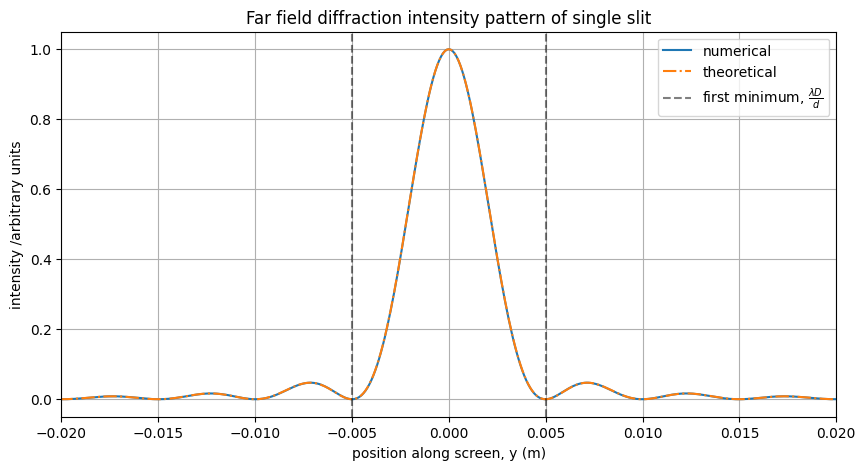

In [4]:
# Perform Fourier transform on top_hat_aperture
plt.figure(figsize=(10,5))
def theoretical_diffraction_pattern(y_prime, d):
    # return (d*np.sin(y_prime*d/2)/(y_prime*d/2))**2
    return (d*np.sinc(y_prime*d/2/np.pi))**2

f = np.fft.fftfreq(N, delta)  # multiply by 2pi to convert to angular frequency
w = f*2*np.pi
y_prime = np.fft.fftshift(w)
y = y_prime * D/k # distance along screen
Y = np.fft.fft(single_slit_grating(x, d))
Y = np.fft.fftshift(Y)

# plt.plot(y, abs(Y)**2, label="numerical")
plt.plot(y, Y**2 / max(Y**2), label="numerical")
plt.plot(y, theoretical_diffraction_pattern(y_prime,d)/max(theoretical_diffraction_pattern(y_prime,d)), label="theoretical", linestyle='-.')
plt.axvline(x=D*wavelength/d, color='k', alpha=0.5, label=r"first minimum, $\frac{\lambda D}{d}$", linestyle='--')
plt.axvline(x=-1*D*wavelength/d, color='k', alpha=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.xlabel("position along screen, y (m)")
plt.ylabel("intensity /arbitrary units")
plt.title('Far field diffraction intensity pattern of single slit')
plt.xlim(-0.02, 0.02)
plt.show()

#### Conclusion (Core task 1):
- Theoretical prediction and numerical simulation agrees!
- Learning point: fftfreq outputs frequency in Hz, but we want it to be in rad $s^{-1}$, so we have to multiply by $2\pi$

### Core task 2

Calculate Fraunhofer pattern for sinusoidal grating:
$$
A(x) = \begin{cases}
e^{i\phi(x)}&, |x| < d/2 \\
0&, otherwise
\end{cases}
$$

$$\phi(x) = \frac{m}{2}\sin\left(\frac{2\pi x}{s}\right)$$

where s is the spacing of the phase amxima, $s=100 \mu m$, $m=8$. Fresnel distance is 8m.


In [5]:
# Physical parameters
wavelength = 500e-9
D = 10 # Distance to screen
L =5e-3 # Extent of the aperture
d = 2e-3 # Width of the slit
k = 2*np.pi/wavelength # Wavenumber
x_max = d/2 # Maximum extent of the aperture
fresnel_distance = 8
m = 8
s = 100e-6

# Simulation parameters
N = 2**16 # Number of sample points
x = np.linspace(-L/2, L/2, N) # Define the x-axis of aperture
delta = L/N # Distance between sample points

# Define the aperture function
def sinusoidal_phase_grating(x, hat_width):
    phase = (m/2) * np.sin(2*np.pi*x/s)
    a = 1.0 * np.exp(1j*phase)
    left = int(N/2 - hat_width/delta/2)
    right = int(N/2 + hat_width/delta/2)
    # set the aperture to zero outside the range
    a[:left+1] = 0
    a[right:-1] = 0
    return a

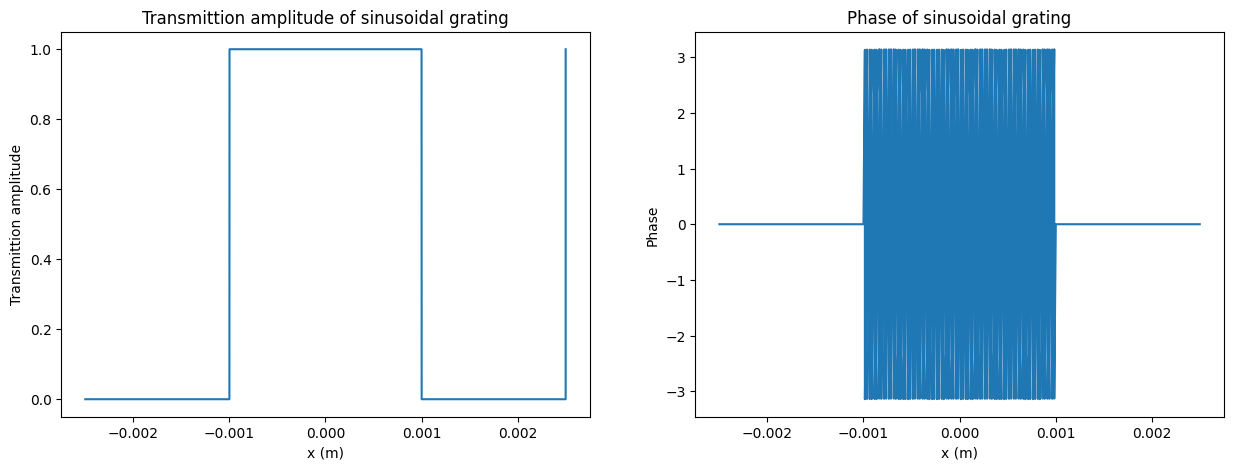

In [6]:
# Plot of the slit
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(x, np.abs(sinusoidal_phase_grating(x, d)))
plt.title('Transmittion amplitude of sinusoidal grating')
plt.xlabel('x (m)')
plt.ylabel('Transmittion amplitude')
plt.subplot(1, 2, 2)
plt.plot(x, np.angle(sinusoidal_phase_grating(x, d)))
plt.title('Phase of sinusoidal grating')
plt.xlabel('x (m)')
plt.ylabel('Phase')
plt.show()

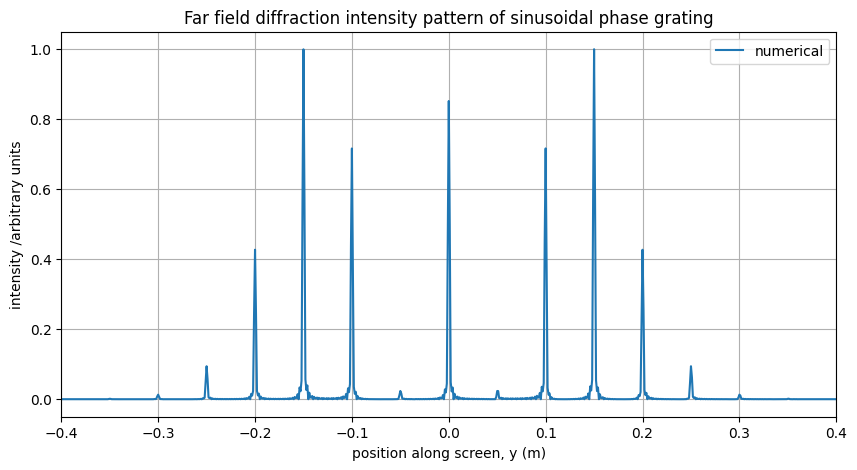

In [7]:
# Perform Fourier transform on top_hat_aperture
plt.figure(figsize=(10,5))

f = np.fft.fftfreq(N, delta)  # multiply by 2pi to convert to angular frequency
w = f*2*np.pi
y_prime = np.fft.fftshift(w)
y = y_prime * D/k # distance along screen
Y = np.fft.fft(sinusoidal_phase_grating(x, d))
Y = np.fft.fftshift(Y)

# plt.plot(y, abs(Y)**2, label="numerical")
plt.plot(y, abs(Y)**2 / max(abs(Y)**2), label="numerical")
plt.legend()
plt.grid()
plt.xlabel("position along screen, y (m)")
plt.ylabel("intensity /arbitrary units")
plt.xlim(-0.4, 0.4)
plt.title('Far field diffraction intensity pattern of sinusoidal phase grating')
plt.show()

Conclusion (Core task 2):
- The resulting pattern form regularly spaced sharp peaks at 0.05m intervals.

### Core task 3: adding phase correction to the aperture function for near-field calculation



In [8]:
# Physical parameters
wavelength = 500e-9
d_slit = 100e-6 # Width of the single slit
D_slit = 5e-3 # Distance to screen for single slit

d_grating = 2e-3 # Width of the phase grating
D_grating = 0.5 # Distance to screen for phase grating
L =5e-3 # Extent of the aperture
k = 2*np.pi/wavelength # Wavenumber
x_max = d/2 # Maximum extent of the aperture
fresnel_distance = 8
m = 8
s = 100e-6

# Simulation parameters
N = 2**18 # Number of sample points
x = np.linspace(-L/2, L/2, N) # Define the x-axis of aperture
delta = L/N # Distance between sample points

def correection_term(x, hat_width, D):
    a = np.exp(1j*k*x**2/(2*D))
    left = int(N/2 - hat_width/delta/2)
    right = int(N/2 + hat_width/delta/2)
    # set the aperture to zero outside the range
    a[:left+1] = 0
    a[right-1:] = 0
    return a

near_field_single_slit = single_slit_grating(x, d_slit) * correection_term(x, d_slit, D_slit)
near_field_sinusoidal_grating = sinusoidal_phase_grating(x, d_grating) * correection_term(x, d_grating, D_grating)

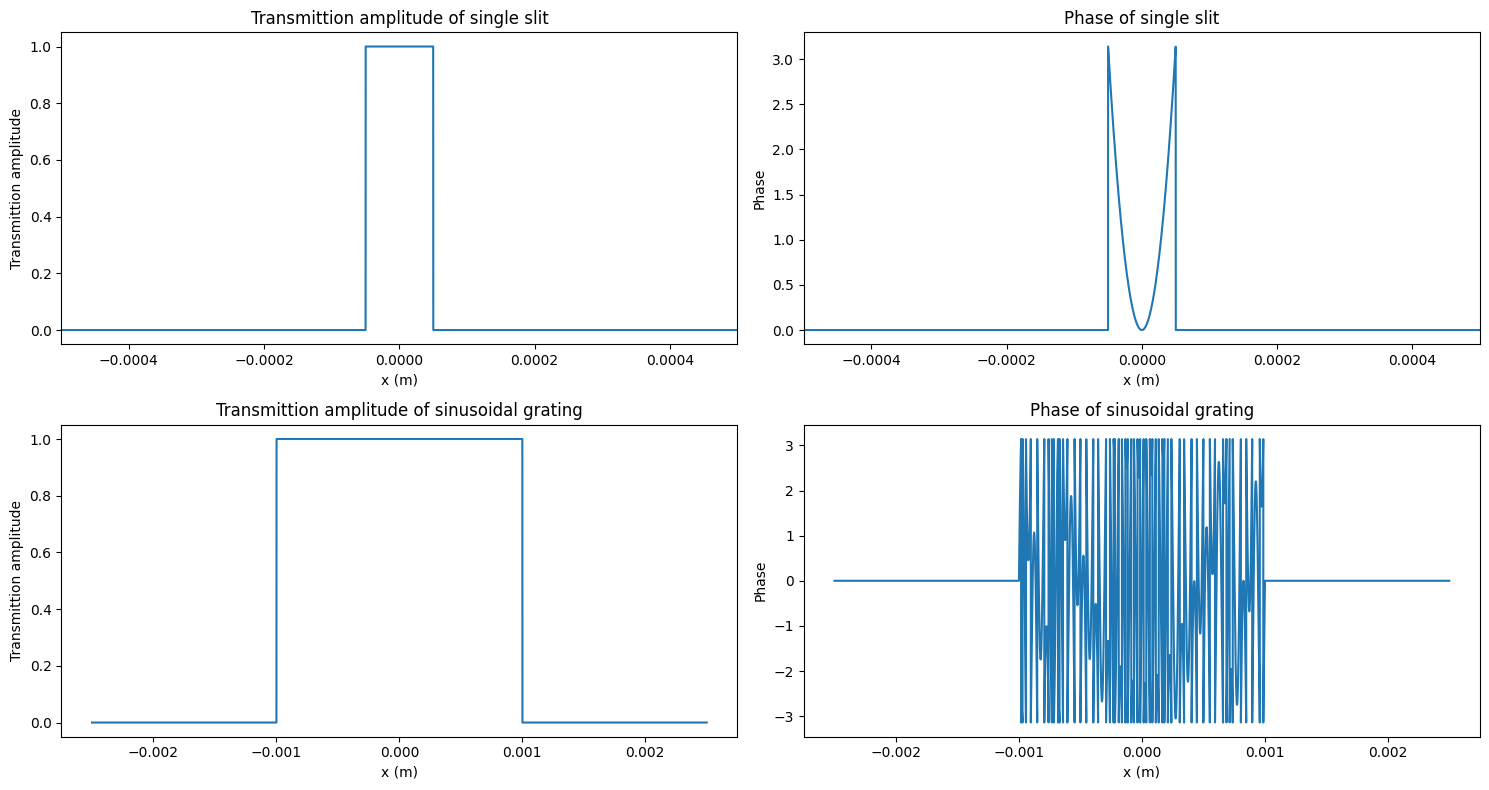

In [9]:
# Plot of the slit
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
plt.plot(x, np.abs(near_field_single_slit))
plt.title('Transmittion amplitude of single slit')
plt.xlabel('x (m)')
plt.ylabel('Transmittion amplitude')
plt.xlim(-0.0005, 0.0005)

plt.subplot(2, 2, 2)
plt.plot(x, np.angle(near_field_single_slit))
plt.title('Phase of single slit')
plt.xlabel('x (m)')
plt.ylabel('Phase')
plt.xlim(-0.0005, 0.0005)

plt.subplot(2, 2, 3)
plt.plot(x, np.abs(near_field_sinusoidal_grating))
plt.title('Transmittion amplitude of sinusoidal grating')
plt.xlabel('x (m)')
plt.ylabel('Transmittion amplitude')

plt.subplot(2, 2, 4)
plt.plot(x, np.angle(near_field_sinusoidal_grating))
plt.title('Phase of sinusoidal grating')
plt.xlabel('x (m)')
plt.ylabel('Phase')


plt.tight_layout()
plt.show()

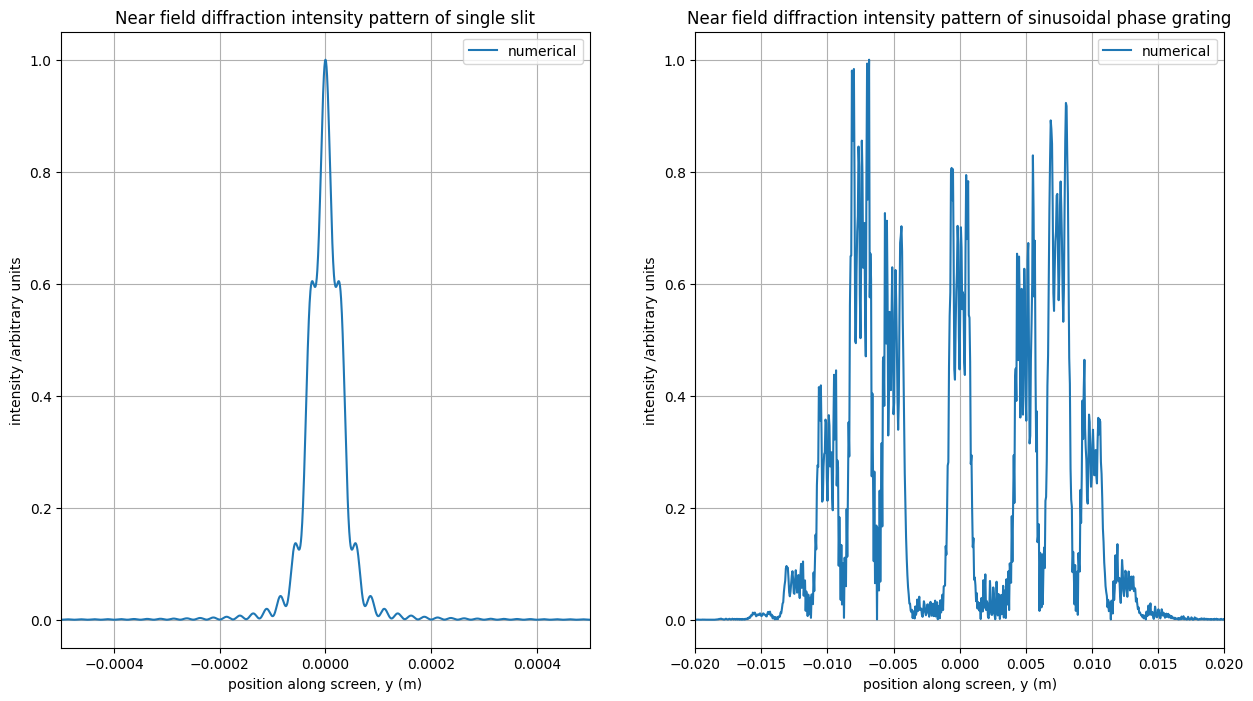

In [10]:
# Perform Fourier transform on top_hat_aperture
plt.figure(figsize=(15,8))
f = np.fft.fftfreq(N, delta)  # multiply by 2pi to convert to angular frequency
w = f*2*np.pi
y_prime = np.fft.fftshift(w)


y = y_prime * D_slit/k # distance along screen
Y1 = np.fft.fft(near_field_single_slit)
Y1 = np.fft.fftshift(Y1)

# plt.plot(y, abs(Y)**2, label="numerical")
plt.subplot(1, 2, 1)
plt.plot(y, abs(Y1)**2 / max(abs(Y1)**2), label="numerical")
plt.legend()
plt.grid()
plt.xlabel("position along screen, y (m)")
plt.ylabel("intensity /arbitrary units")
plt.xlim(-0.0005, 0.0005) #near
# plt.xlim(-0.03, 0.03) #far
plt.title('Near field diffraction intensity pattern of single slit')
# plt.axvline(x=D_slit*wavelength/d_slit, color='k', alpha=0.5, label=r"first minimum, $\frac{\lambda D}{d}$", linestyle='--')


y = y_prime * D_grating/k # distance along screen
Y2 = np.fft.fft(near_field_sinusoidal_grating)
Y2 = np.fft.fftshift(Y2)

plt.subplot(1, 2, 2)
plt.plot(y, abs(Y2)**2 / max(abs(Y2)**2), label="numerical")
plt.legend()
plt.grid()
plt.xlabel("position along screen, y (m)")
plt.ylabel("intensity /arbitrary units")
plt.xlim(-0.02, 0.02) #near
# plt.xlim(-0.4, 0.4) #far
plt.title('Near field diffraction intensity pattern of sinusoidal phase grating')
plt.show()

#### Conclusion (Core task 3):
- The plots look sensible 

### Supplementary task 1: evaluating the Fresnel integrals
$$
C(u) = \int_0^{u} \cos\left(\frac{\pi x^2}{2}\right)dx
$$
$$
S(u) = \int_0^{u} \sin\left(\frac{\pi x^2}{2}\right)dx
$$

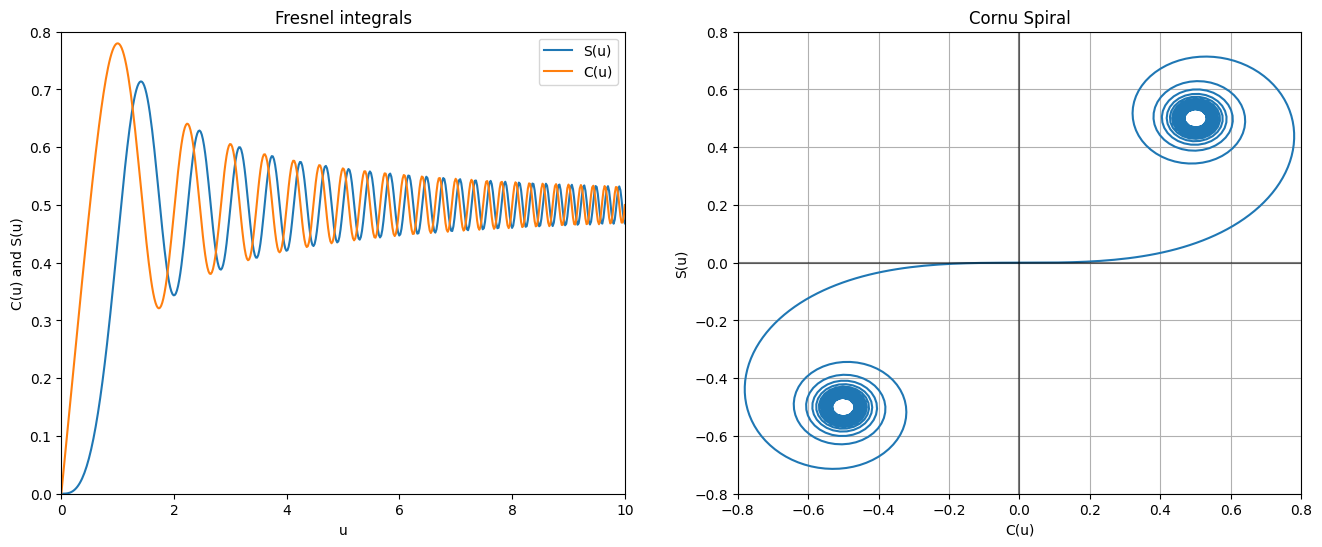

''

In [11]:
def C(x):
    return np.cos(np.pi * x**2/2)
def S(x):
    return np.sin(np.pi * x**2/2)

u = np.linspace(-10, 10, 1000)
C_u = [integrate.quad(C, 0, i)[0] for i in u]
S_u = [integrate.quad(S, 0, i)[0] for i in u]

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(u, S_u, label='S(u)')
plt.plot(u, C_u, label='C(u)')
plt.xlabel('u')
plt.ylabel('C(u) and S(u)')
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 0.8)
plt.title('Fresnel integrals')

plt.subplot(1,2,2)
plt.plot(C_u, S_u, label='S(u)')
plt.ylim(-0.8, 0.8)
plt.xlim(-0.8, 0.8)
plt.grid()
plt.axvline(x=0, color='k', alpha=0.5)
plt.axhline(y=0, color='k', alpha=0.5)
plt.title("Cornu Spiral")
plt.xlabel('C(u)')
plt.ylabel('S(u)')
plt.show()
;

Conclusions (Supplementary task 1):
- Cornu spirals are observed.

### Supplementary taks 2

In [12]:
# Physical parameters
wavelength = 500e-9
d = 100e-6 # Width of the single slit
D = 5e-3 # Distance to screen for single slit
L = 5e-3 # Extent of the aperture
k = 2*np.pi/wavelength # Wavenumber
x_max = d/2 # Maximum extent of the aperture

# Simulation parameters
N = 2**15 # Number of sample points
x = np.linspace(-L/2, L/2, N) # Define the x-axis of aperture
delta = L/N # Distance between sample points

def single_slit_grating(x, hat_width):
    a = np.zeros(N)
    left = int(N/2 - hat_width/delta/2)
    right = int(N/2 + hat_width/delta/2)
    a[left-1:right+1] = 1.0
    return a

single_slit = single_slit_grating(x, d)
scaled_x = x * np.sqrt(2/(wavelength*D))
def fresnel_integral(x, wavelength, D):
    scaled_x = x * np.sqrt(2/(wavelength*D))
    return C(scaled_x) + 1j * S(scaled_x)
x = np.array(x, dtype="complex_")
# Observe centre of screen
psi = np.array([integrate.quad(func=fresnel_integral, a=-1*(i+d/2), b=d/2-i, args=(wavelength, D), complex_func = True)[0] for i in x])

/Users/shikang/miniconda3/envs/virtualenv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:575: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


In [13]:
x

array([-0.0025    +0.j, -0.00249985+0.j, -0.00249969+0.j, ...,
        0.00249969+0.j,  0.00249985+0.j,  0.0025    +0.j])

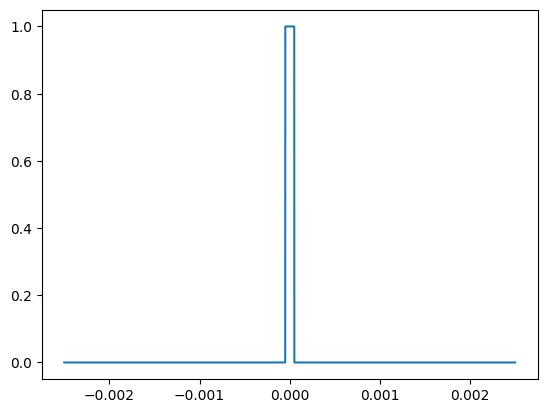

In [14]:
plt.plot(x, single_slit)

Text(0.5, 0.98, 'Near field diffraction intensity pattern of single slit evaluated using Fresnel integral')

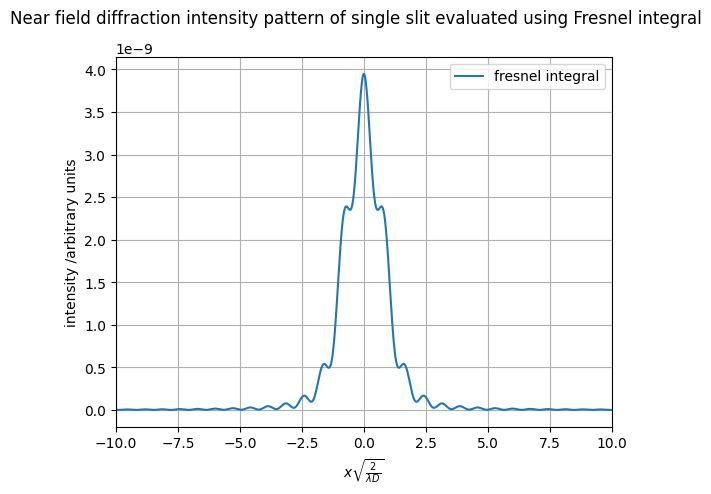

In [36]:

plt.plot(scaled_x, abs(psi)**2, label="fresnel integral")
plt.legend()
plt.grid()
plt.xlabel(r"$x\sqrt{\frac{2}{\lambda D}}$")
plt.ylabel("intensity /arbitrary units")
plt.xlim(-0.0005, 0.0005) #near
plt.xlim(-10, 10)
plt.suptitle('Near field diffraction intensity pattern of single slit evaluated using Fresnel integral')
plt.show()

#### Conclusion (Supplementary task 2):
- The intensity pattern obtained from the integration of the Fresnel integrals coincides with the pattern obtained in core task 3 using FFT.